In this notebook I worked with the time frames data, from my sensor. I used the function, wchich I implemented on Raspberry Pi. 

In [2]:
from asyncio.log import logger
from datetime import datetime
from tkinter import messagebox
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import logging


class PlotData:
    def __init__(self) -> None:
        pass

    def format_date(
        self,
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
    ) -> list:

        start_date = "{} {}".format(selected_start_date, selected_start_time)
        end_date = "{} {}".format(selected_end_date, selected_end_time)

        times = [start_date, end_date]

        try:
            format_dates = [datetime.strptime(i, "%d/%m/%y %H:%M:%S") for i in times]
        except ValueError:
            format_dates = [datetime.strptime(i, "%m/%d/%y %H:%M:%S") for i in times]

        return format_dates

    def logging_err(self, type_err):

        if type_err == "data_plot_err":
            return logger.warn(
                logging.warning("{} Not selected data to plot".format(datetime.now()))
            )
        elif type_err == "hour_data_err":
            return logger.warn(
                logging.warning("{} Wrong format".format(datetime.now()))
            )

    def selected_values(self, selected_values):
        return selected_values

    @staticmethod
    def plot_chart(
        selected_start_date,
        selected_start_time,
        selected_end_date,
        selected_end_time,
        selected_vars,
    ):

        plt.close()

        plot = PlotData()

        filter_values = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

        bool_values = dict(zip(filter_values, plot.selected_values(selected_vars)))

        filtered_values = []

        filtered_values = [key for key, val in bool_values.items() if val == 1]

        logging.info(filtered_values)

        try:
            full_time = plot.format_date(
                selected_start_date,
                selected_start_time,
                selected_end_date,
                selected_end_time,
            )
        except ValueError:
            print("Hour Err".upper())
            plot.logging_err("hour_data_err")

        air_poll_df = pd.read_csv(
            "air_pollution_smog_1.csv", sep=","
        )

        try:

            [pd.to_datetime(i) for i in full_time]

            start_date = full_time[0]
            end_date = full_time[1]

            air_poll_df["date"] = pd.to_datetime(air_poll_df["date"])
            plot_df = (air_poll_df["date"] >= start_date) & (
                air_poll_df["date"] <= end_date
            )
            plot_df_2 = air_poll_df.loc[plot_df]

            plt.rcParams["figure.figsize"] = [16.0, 6.0]
            plt.rcParams["figure.autolayout"] = True

            try:

                plot_df_2.plot(x="date", y=filtered_values)

                plt.suptitle(
                    "Wartości mierzone przez miernik w okresie\n{} Do {} ".format(
                        start_date, end_date
                    ).upper(),
                    fontsize=12,
                    color="black",
                )

                plt.xlabel("Data", fontsize=12, color="black")
                plt.ylabel("Wartości", fontsize=12, color="black")
                plt.show()
            except TypeError:
                print("No Data!".upper())
                plot.logging_err("data_plot_err")

                print(air_poll_df.head())

        except UnboundLocalError:
            pass


plot_vars_template = ["PM1", PM2.5, "PM10", "temp", "pressure", "humidity"]


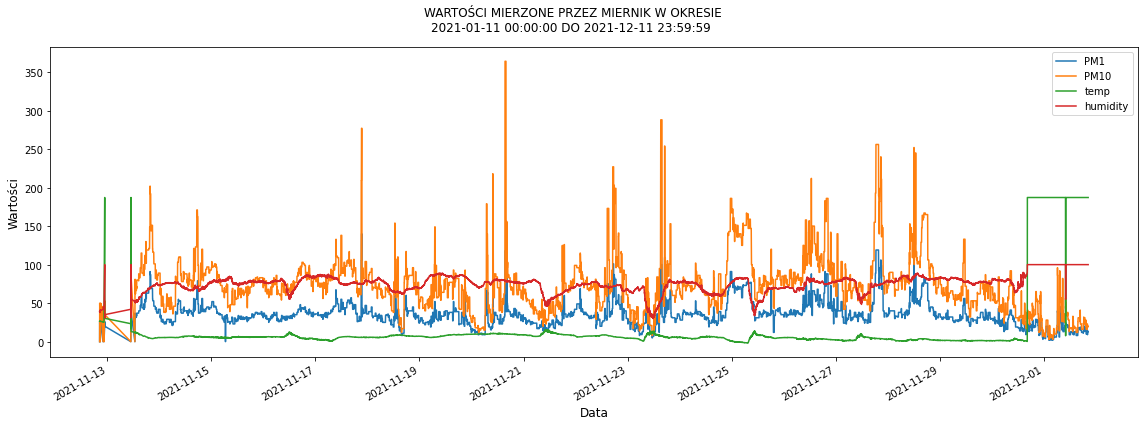

In [6]:
import string
import tkinter as tk

from numpy import isin

plot = PlotData()

def get_selected_vars(sel_vars):
    return [1 if isinstance(i, str) else 0 for i in sel_vars]

selected_start_date = "11/1/21" 
selected_start_time = "00:00:00"
selected_end_date =  "11/12/21" 
selected_end_time = "23:59:59"
selected_vars = get_selected_vars(["PM1", 0, "PM10", "temp", 0, "humidity"])

plot.plot_chart(selected_start_date, selected_start_time, selected_end_date, selected_end_time, selected_vars)